# Validation tools
**GOAL** Goal to ensure that our model to perfom well

Type of Tools:

+ Train Test Split
+ Cross Validation
+ Validation curve
+ GridSearch CV
+ Confusion Matrix
+ Learning Curve <br>
**HomeWork**
+ ROC Function
+ AUC 

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## import iris dataset
[Check sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# X ==> FEATURES
# y ==> TARGET
X = iris.data
y = iris.target

# Visualization
Via matplotlib

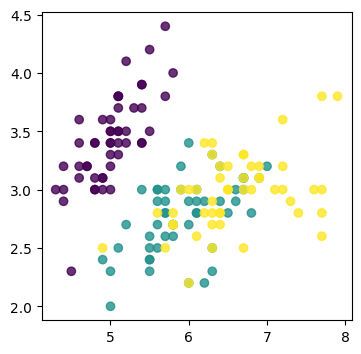

In [ ]:
# X[:, 0] ==> 'sepal length (cm)',
# X[:, 1] ==> 'sepal width (cm)'
# use target as Color differenciation..
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

### Train Test Split


En machine learning, il est essentiel de ne pas évaluer le modèle sur les données qui ont servi à l'entraînement. Tester le modèle sur des données qu'il n'a jamais vues est beaucoup plus fiable et représentatif de sa performance réelle sur des données inconnues. C'est pourquoi nous divisons toujours notre dataset en deux ensembles distincts :

1. Le jeu d'entraînement **Training Set** : utilisé pour entraîner le modèle.
2. le Jeu de test **Test Set** : utilisé pour évaluer la performance du modèle.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9


In [7]:
print("Dataset Complet:", X.shape)

Dataset Complet: (150, 4)


In [8]:
print("Train Set: ", X_train.shape)
print("Test Set: ", X_test.shape)

Train Set:  (120, 4)
Test Set:  (30, 4)


#### Plotting my Train and Test Sets

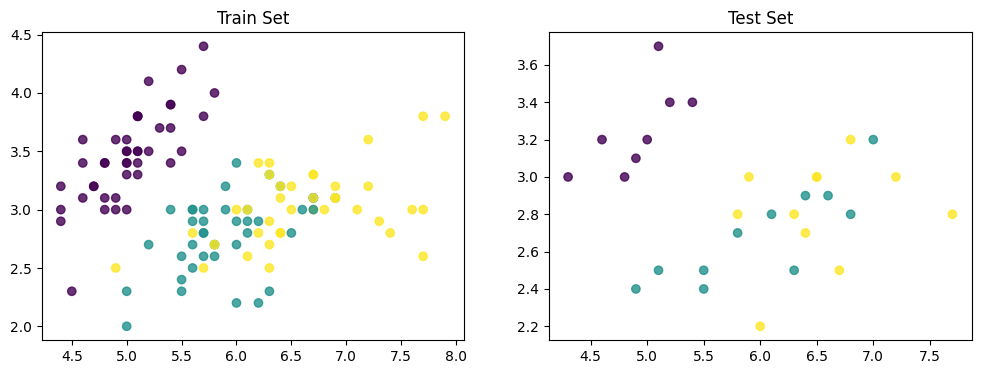

In [ ]:
plt.figure(figsize=(12, 4))  # Canvas

# subplot for Train Set
plt.subplot(121)
plt.title("Train Set")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)

# subplot for Test Set
plt.subplot(122)
plt.title("Test Set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)

plt.show()

# Validation Set and Cross Validation

## Validation Set

En machine learning, en plus des ensembles d'entraînement et de test, nous utilisons parfois un troisième ensemble appelé ensemble de validation. Voici comment cela fonctionne :

1. **Ensemble d'entraînement** (Training Set) : utilisé pour entraîner le modèle.
2. **Ensemble de validation** (Validation Set) : utilisé pour ajuster les hyperparamètres du modèle. Les hyperparamètres sont des paramètres du modèle qui ne peuvent pas être appris à partir des données et doivent être définis avant l'entraînement.
3. **Ensemble de test** (Test Set) : utilisé pour évaluer la performance finale du modèle après l'ajustement des hyperparamètres.

L'ensemble de validation permet de choisir le meilleur modèle parmi plusieurs configurations en évitant l'overfitting sur l'ensemble d'entraînement. Cependant, cette approche réduit la quantité de données disponibles pour l'entraînement et le test.

## Cross Validation

Pour maximiser l'utilisation des données disponibles, nous utilisons une technique appelée validation croisée (cross validation). Voici les étapes principales :

1. **K-Fold Cross Validation** :
   - Les données sont divisées en K sous-ensembles (ou "folds").
   - Le modèle est entraîné K fois, chaque fois en utilisant K-1 sous-ensembles pour l'entraînement et le sous-ensemble restant pour la validation.
   - Le processus est répété de manière à ce que chaque sous-ensemble soit utilisé une fois comme ensemble de validation.

2. **Stratified K-Fold Cross Validation** :
   - Similaire à la validation croisée K-Fold, mais les folds sont créés de manière à ce que chaque fold ait une proportion similaire de classes que l'ensemble de données d'origine (utile pour les ensembles de données déséquilibrés).

### Avantages de la Validation Croisée

- **Utilisation efficace des données** : Toutes les observations sont utilisées à la fois pour l'entraînement et pour la validation.
- **Réduction de la variance** : Fournit une meilleure estimation de la performance du modèle en moyenne sur différentes partitions des données.
- **Détection d'overfitting** : Aide à évaluer comment le modèle généralise sur des données non vues, réduisant ainsi le risque d'overfitting sur l'ensemble de validation.

### Exemple de K-Fold Cross Validation (K=5)
1. Diviser le dataset en 5 folds.
2. Entraîner le modèle sur les folds 1 à 4 et valider sur le fold 5.
3. Entraîner le modèle sur les folds 1 à 3 et le fold 5, valider sur le fold 4.
4. Répéter jusqu'à ce que chaque fold ait été utilisé comme ensemble de validation une fois.
5. Calculer la moyenne des scores de validation pour obtenir une estimation de la performance du modèle.

La validation croisée est une méthode robuste pour évaluer les modèles et optimiser les hyperparamètres, particulièrement utile lorsque les données disponibles sont limitées.

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
model = KNeighborsClassifier(n_neighbors=2)
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

array([0.91666667, 0.95833333, 1.        , 0.91666667, 0.95833333])

In [12]:
model = KNeighborsClassifier(n_neighbors=2)
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()

0.95

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()

0.975

### Iterator for CrossVal

*Plus on est de fous plus on rit ???*

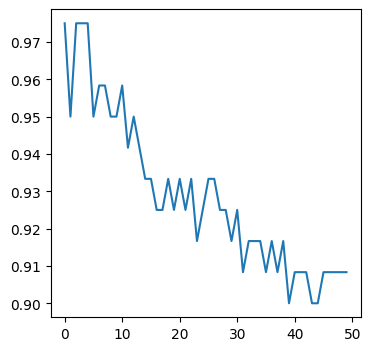

In [ ]:
val_score = []

n_neighbors = range(1, 51)

for n_neighbor in n_neighbors:
    score = cross_val_score(
        KNeighborsClassifier(n_neighbor), X_train, y_train, cv=5, scoring="accuracy"
    ).mean()
    val_score.append(score)
plt.figure(figsize=(4, 4))
plt.plot(val_score)

En effet, Scikit-Learn fournit une méthode appelée validation_curve qui permet de générer des courbes de validation de manière plus concise et efficace. Voici comment vous pouvez utiliser validation_curve pour obtenir les scores de validation pour différentes valeurs de l'hyperparamètre n_neighbors dans un KNeighborsClassifier :

# Validation Curve

La courbe de validation (validation curve) est un outil important en machine learning pour évaluer la performance d'un modèle en fonction d'un hyperparamètre spécifique. Voici les objectifs et les avantages de l'utilisation de la validation curve :

### Objectifs de la Validation Curve

1. **Évaluation des Hyperparamètres :**
   - La validation curve permet d'évaluer l'impact d'un hyperparamètre sur la performance du modèle. En traçant la courbe pour différentes valeurs de cet hyperparamètre, on peut identifier les valeurs optimales qui améliorent la performance du modèle.

2. **Détection du Sous-ajustement et du Sur-ajustement :**
   - **Sous-ajustement (underfitting)** : Se produit lorsque le modèle est trop simple et ne capture pas la complexité des données. Cela se traduit par des scores d'entrainement et de validation faibles.
   - **Sur-ajustement (overfitting)** : Se produit lorsque le modèle est trop complexe et capture le bruit des données d'entrainement. Cela se traduit par des scores d'entrainement élevés mais des scores de validation faibles.
   - La validation curve aide à identifier ces deux phénomènes en montrant comment les scores d'entrainement et de validation changent avec l'hyperparamètre.

3. **Optimisation de la Performance du Modèle :**
   - En identifiant l'hyperparamètre qui donne le meilleur équilibre entre sous-ajustement et sur-ajustement, on peut choisir une valeur optimale qui maximise la performance du modèle sur les données de validation.

### Comment Utiliser la Validation Curve

Pour comprendre comment utiliser une validation curve, voici les étapes typiques :

1. **Sélectionner un Hyperparamètre :**
   - Choisissez un hyperparamètre du modèle que vous souhaitez évaluer. Par exemple, dans un `KNeighborsClassifier`, cela pourrait être `n_neighbors`.

2. **Définir une Plage de Valeurs :**
   - Définissez une plage de valeurs possibles pour cet hyperparamètre.

3. **Calculer les Scores de Validation :**
   - Utilisez la fonction `validation_curve` pour calculer les scores de validation pour chaque valeur de l'hyperparamètre en utilisant la validation croisée.

```python
python
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

Définir les valeurs des hyperparamètres que vous souhaitez évaluer
param_range = np.arange(1, 50)

Utiliser validation_curve pour calculer les scores de validation
train_scores, val_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy"
)

Calculer la moyenne et l'écart-type des scores de validation
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

Tracer la courbe de validation
plt.figure()
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.plot(param_range, val_scores_mean, label="Cross-validation score", color="darkorange", lw=2)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color="darkorange", lw=2)
plt.legend(loc="best")
plt.show()
```
### Interprétation

- **Sous-ajustement** *UnderFitting* : Si les scores d'entrainement et de validation sont tous deux faibles pour toutes les valeurs de l'hyperparamètre.
- **Sur-ajustement** *OverFitting* : Si les scores d'entrainement sont élevés mais les scores de validation sont faibles pour certaines valeurs de l'hyperparamètre.
- **Valeur optimale de l'hyperparamètre** : La valeur pour laquelle les scores de validation sont maximisés, tout en évitant un grand écart entre les scores d'entrainement et de validation.

En résumé, la validation curve est un outil essentiel pour évaluer et optimiser les hyperparamètres d'un modèle, permettant ainsi d'améliorer la performance du modèle et d'éviter les problèmes de sous-ajustement et de sur-ajustement.

In [15]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

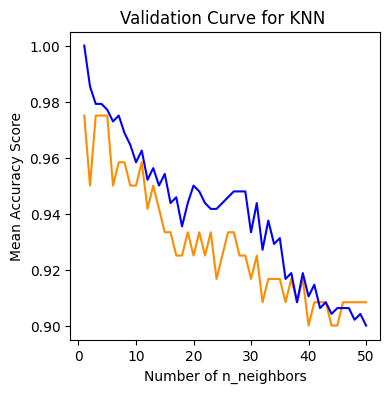

In [ ]:
# Definir les valeurs de l'hyperparamètre n_neighbors que je souhaite voir evoluer.
param_range = np.arange(1, 51)

# Utiliser la validation curve pour calculer les scores de validation et de training
train_scores, validation_scores = validation_curve(
    KNeighborsClassifier(),
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
)


# Calculer la moyenne et l'ecart-type des scores de validation

val_score_mean = np.mean(validation_scores, axis=1)
val_score_std = np.std(validation_scores, axis=1)

train_scores_mean = np.mean(train_scores, axis=1)

# Tracer la courbe de validation
plt.figure(figsize=(4, 4))
plt.title("Validation Curve for KNN ")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Mean Accuracy Score")
plt.plot(param_range, val_score_mean, label="Validation Score", color="darkorange")
plt.plot(param_range, train_scores_mean, label="Training Score", color="blue")
plt.show()

### GridSearchCV: Optimisation de Hyperparamètres

**GridSearchCV** est une technique d'optimisation des hyperparamètres qui permet de tester plusieurs combinaisons de paramètres pour trouver la meilleure configuration pour un modèle. Cette méthode est particulièrement utile pour ajuster plusieurs hyperparamètres en même temps.

#### Objectifs de GridSearchCV

1. **Recherche de la Meilleure Combinaison d'Hyperparamètres:**
   - GridSearchCV évalue systématiquement toutes les combinaisons possibles des hyperparamètres spécifiés dans une grille.

2. **Validation Croisée:**
   - GridSearchCV utilise la validation croisée pour évaluer la performance de chaque combinaison d'hyperparamètres. Cela permet de généraliser les résultats et de réduire le risque de sur-ajustement.

3. **Simplification du Processus d'Optimisation:**
   - En automatisant la recherche des meilleures combinaisons d'hyperparamètres, GridSearchCV simplifie et accélère le processus d'optimisation, évitant ainsi le besoin de réglages manuels fastidieux.

#### Comment Utiliser GridSearchCV

1. **Définir le Modèle et les Hyperparamètres:**
   - Spécifiez le modèle que vous souhaitez optimiser et les hyperparamètres à tester.

2. **Créer une Grille de Hyperparamètres:**
   - Définissez une grille de valeurs pour chaque hyperparamètre que vous souhaitez tester.

3. **Exécuter GridSearchCV:**
   - Utilisez GridSearchCV pour évaluer toutes les combinaisons de la grille en utilisant la validation croisée.

4. **Obtenir les Meilleurs Paramètres:**
   - GridSearchCV retourne la combinaison d'hyperparamètres qui donne la meilleure performance sur les données de validation.

#### Explication

1. **Définir le Modèle:**
   - `knn = KNeighborsClassifier()`: Crée une instance du modèle `KNeighborsClassifier`.

2. **Définir la Grille de Hyperparamètres:**
   - `param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}`: Spécifie les valeurs à tester pour `n_neighbors` et `weights`.

3. **Créer une Instance de GridSearchCV:**
   - `grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')`: Crée une instance de `GridSearchCV` avec validation croisée (cv=5) et en utilisant l'exactitude (`accuracy`) comme métrique de scoring.

4. **Exécuter GridSearchCV:**
   - `grid_search.fit(X_train, y_train)`: Entraîne le modèle en testant toutes les combinaisons de la grille de paramètres.

5. **Obtenir les Meilleurs Hyperparamètres:**
   - `grid_search.best_params_`: Retourne la meilleure combinaison d'hyperparamètres.
   - `grid_search.best_score_`: Retourne le meilleur score de validation croisée.

6. **Utiliser le Meilleur Modèle Trouvé:**
   - `best_model = grid_search.best_estimator_`: Utilise le meilleur modèle trouvé pour faire des prédictions ou pour une évaluation plus approfondie.

### Conclusion

GridSearchCV est un outil puissant pour l'optimisation des hyperparamètres, permettant de tester systématiquement toutes les combinaisons possibles et de choisir celle qui offre la meilleure performance. En utilisant la validation croisée, GridSearchCV garantit que les résultats sont généralisables et réduit le risque de sur-ajustement. C'est un composant essentiel de toute pipeline de machine learning pour obtenir des modèles optimisés.

In [ ]:
# metric : euclidean , manhattan

from sklearn.model_selection import GridSearchCV


k = np.arange(1, 21)

param_grid = {
    "n_neighbors": k,
    "metric": ["euclidean", "manhattan", "cityblock", "cosine"],
}


grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cityblock',
                                    'cosine'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [18]:
grid.best_estimator_

KNeighborsClassifier(metric='cosine', n_neighbors=4)

In [19]:
grid.best_params_

{'metric': 'cosine', 'n_neighbors': 4}

In [20]:
grid.best_score_

0.9833333333333334

In [ ]:
KNeighborsClassifier(metric="cosine", n_neighbors=4)

KNeighborsClassifier(metric='cosine', n_neighbors=4)

In [22]:
results_grid = pd.DataFrame(grid.cv_results_)
results_grid.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002597,0.000480,0.013828,0.002299,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.958333,1.000000,1.000000,0.958333,0.958333,0.975000,0.020412,8
1,0.002045,0.000662,0.011633,0.001806,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.916667,0.958333,1.000000,0.916667,0.958333,0.950000,0.031180,44
2,0.002912,0.000673,0.010942,0.001765,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.958333,1.000000,1.000000,0.958333,0.958333,0.975000,0.020412,8
3,0.002036,0.000663,0.009761,0.003254,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.958333,1.000000,0.958333,1.000000,0.958333,0.975000,0.020412,8
4,0.002228,0.000754,0.008503,0.001791,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.958333,1.000000,0.958333,1.000000,0.958333,0.975000,0.020412,8
5,0.001959,0.000577,0.011220,0.002704,euclidean,6,"{'metric': 'euclidean', 'n_neighbors': 6}",0.958333,0.958333,0.916667,0.958333,0.958333,0.950000,0.016667,44
6,0.002131,0.000269,0.008916,0.000647,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.958333,0.958333,0.916667,1.000000,0.958333,0.958333,0.026352,27
7,0.001769,0.000387,0.005905,0.002657,euclidean,8,"{'metric': 'euclidean', 'n_neighbors': 8}",0.958333,0.958333,0.916667,1.000000,0.958333,0.958333,0.026352,27
8,0.001001,0.000633,0.004757,0.000659,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.958333,0.958333,0.958333,0.958333,0.916667,0.950000,0.016667,44
9,0.000599,0.000489,0.004187,0.001569,euclidean,10,"{'metric': 'euclidean', 'n_neighbors': 10}",0.958333,0.958333,0.958333,0.958333,0.916667,0.950000,0.016667,44


# learning Curve

### Learning Curve: Définition et Objectifs

**Définition:**
Une courbe d'apprentissage (Learning Curve) est un graphe qui représente la performance d'un modèle de machine learning en fonction de la taille de l'ensemble de données utilisé pour l'entraîner. Typiquement, la courbe montre l'erreur ou la précision du modèle sur les ensembles de données d'entraînement et de validation en fonction du nombre d'échantillons d'entraînement.

**Objectifs de la Learning Curve:**

1. **Évaluer la Performance du Modèle:**
   - La courbe d'apprentissage permet de visualiser comment la performance du modèle évolue à mesure que la quantité de données d'entraînement augmente. Elle aide à comprendre si le modèle bénéficie de davantage de données ou non.

2. **Diagnostiquer le Sous-Ajustement et le Sur-Ajustement:**
   - **Sous-Ajustement (Underfitting):** Si la courbe d'entraînement montre une erreur élevée et la courbe de validation montre également une erreur élevée, cela peut indiquer que le modèle est trop simple pour capturer les relations sous-jacentes dans les données.
   - **Sur-Ajustement (Overfitting):** Si la courbe d'entraînement montre une erreur faible tandis que la courbe de validation montre une erreur élevée, cela peut indiquer que le modèle est trop complexe et qu'il s'ajuste trop aux données d'entraînement, échouant à généraliser aux nouvelles données.

3. **Déterminer la Quantité de Données Nécessaire:**
   - La courbe d'apprentissage peut montrer si le modèle a besoin de plus de données pour améliorer sa performance. Si les erreurs d'entraînement et de validation diminuent et se stabilisent à mesure que le nombre d'échantillons d'entraînement augmente, cela suggère que le modèle bénéficie de plus de données.

4. **Ajuster les Hyperparamètres:**
   - En observant la courbe d'apprentissage, les praticiens peuvent ajuster les hyperparamètres du modèle pour améliorer la performance, comme la complexité du modèle ou les paramètres de régularisation.

#### Exemple d'Interprétation d'une Learning Curve

1. **Courbe de Sous-Ajustement:**
   - Les erreurs d'entraînement et de validation sont élevées et ne diminuent pas significativement avec l'ajout de plus de données d'entraînement. Cela indique que le modèle est trop simple.

2. **Courbe de Sur-Ajustement:**
   - L'erreur d'entraînement est très faible, mais l'erreur de validation est élevée et ne diminue pas avec plus de données. Cela indique que le modèle est trop complexe.

3. **Courbe Idéale:**
   - Les erreurs d'entraînement et de validation diminuent et se stabilisent à un niveau bas et similaire avec l'augmentation des données d'entraînement, indiquant que le modèle est bien équilibré.

#### Utilisation de Learning Curves

Dans scikit-learn, vous pouvez utiliser la fonction `learning_curve` pour générer une courbe d'apprentissage.

```python
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Exemple avec un modèle SVM
from sklearn.svm import SVC
model = SVC()

# Génération de la courbe d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcul des moyennes et des écarts-types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot des courbes d'apprentissage
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
```

### Conclusion

La courbe d'apprentissage est un outil puissant pour évaluer et diagnostiquer la performance d'un modèle de machine learning. Elle permet de visualiser le comportement du modèle par rapport à différentes tailles d'échantillons d'entraînement, aidant ainsi à détecter les problèmes de sous-ajustement et de sur-ajustement, à ajuster les hyperparamètres et à déterminer la quantité optimale de données d'entraînement.<br>

## Récapitulatif : Overfitting et Underfitting

| **Concept**       | **Validation Curve**                                      | **Learning Curve**                                |
|-------------------|------------------------------------------------------------|---------------------------------------------------|
| **Overfitting**   | - Haute précision sur les données d'entraînement<br>- Basse précision sur les données de validation<br>- Modèle trop complexe | - L'erreur d'entraînement diminue<br>- L'erreur de validation augmente ou se stabilise après un certain point<br>- Modèle trop complexe |
| **Underfitting**  | - Basse précision sur les données d'entraînement<br>- Basse précision sur les données de validation<br>- Modèle trop simple | - Erreur d'entraînement et d'erreur de validation élevées<br>- Le modèle est trop simple pour capturer les patterns des données |

## Validation Curve
- Évalue l'impact des hyperparamètres sur la performance du modèle.
- Un modèle trop complexe peut entraîner un overfitting, tandis qu'un modèle trop simple peut entraîner un underfitting.

## Learning Curve
- Évalue l'impact de la taille des données d'entraînement ou du nombre d'époques sur la performance du modèle.
- Une courbe d'apprentissage qui montre un overfitting indique une complexité excessive, tandis qu'une courbe montrant un underfitting indique un manque de complexité.

## Exemples de Courbes

### Validation Curve
![Validation Curve](https://www.scikit-yb.org/en/latest/_images/validation_curve-1.png)

### Learning Curve
![Learning Curve](https://www.scikit-yb.org/en/latest/_images/learning_curve_sklearn_example.png)



In [23]:
from sklearn.model_selection import learning_curve

In [ ]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Number of sample: [ 9 19 28 38 48 57 67 76 86 96]


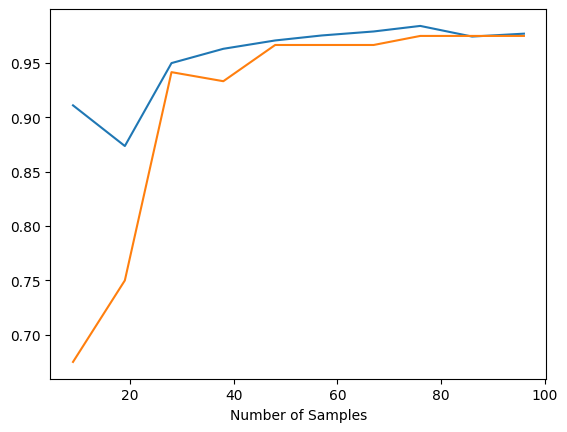

In [ ]:
N, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(), X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5
)

print(f"Number of sample: {N}")
plt.plot(N, train_scores.mean(axis=1), label="Train Score")
plt.plot(N, val_scores.mean(axis=1), label="Validation Score")

plt.xlabel("Number of Samples")
plt.show()

# Confusion Matrix

Confusion Matrix
Définition:
Une matrice de confusion est un tableau qui permet de visualiser la performance d'un algorithme de classification. Elle affiche le nombre de prédictions correctes et incorrectes comparées aux véritables étiquettes des données, en les répartissant dans une matrice de dimension ( n \times n ) pour un problème de classification à ( n ) classes.

Structure d'une Matrice de Confusion pour une Classification Binaire:

|                | Prédiction Positive | Prédiction Négative |
|----------------|---------------------|---------------------|
| Classe Positive | Vrais Positifs (TP)  | Faux Négatifs (FN) |
| Classe Négative | Faux Positifs (FP)   | Vrais Négatifs (TN) |

Vrais Positifs (TP): Nombre de fois où le modèle a prédit la classe positive alors que l'exemple était effectivement positif.
Faux Négatifs (FN): Nombre de fois où le modèle a prédit la classe négative alors que l'exemple était effectivement positif.
Faux Positifs (FP): Nombre de fois où le modèle a prédit la classe positive alors que l'exemple était effectivement négatif.
Vrais Négatifs (TN): Nombre de fois où le modèle a prédit la classe négative alors que l'exemple était effectivement négatif.
Métriques Dérivées de la Matrice de Confusion:

Accuracy (Précision Globale):
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

   
Proportion de prédictions correctes parmi le total des prédictions.

Precision (Précision):
$$\text{Precision} = \frac{TP}{TP + FP}$$

   
Proportion des prédictions positives qui sont effectivement positives.

Recall (Rappel) ou Sensibilité:
$$\text{Recall} = \frac{TP}{TP + FN}$$

   
Proportion des véritables positifs qui sont correctement identifiés par le modèle.

F1-Score:
$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

   
Moyenne harmonique de la précision et du rappel.

Specificity (Spécificité):
$$\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

   
Proportion des véritables négatifs qui sont correctement identifiés par le modèle.
Exemple en Python:

Voici comment créer et afficher une matrice de confusion en utilisant scikit-learn:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ....
# Entraînement d'un modèle de classification
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Interprétation:

Chaque élément de la matrice de confusion indique le nombre de prédictions effectuées pour chaque classe réelle et prédite.
Les éléments diagonaux (TP et TN) indiquent les prédictions correctes.
Les éléments hors de la diagonale (FP et FN) indiquent les prédictions incorrectes.

Conclusion
La matrice de confusion est un outil crucial pour évaluer la performance des modèles de classification. Elle permet de visualiser non seulement l'exactitude des prédictions mais aussi la nature des erreurs commises, fournissant ainsi une base pour des métriques d'évaluation plus détaillées et informatives.

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = KNeighborsClassifier()

model.fit(X_train, y_train)

cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

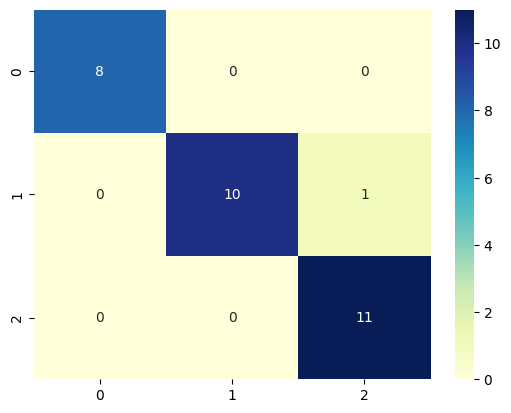

In [ ]:
import seaborn as sns

sns.heatmap(cm, cmap="YlGnBu", annot=True)

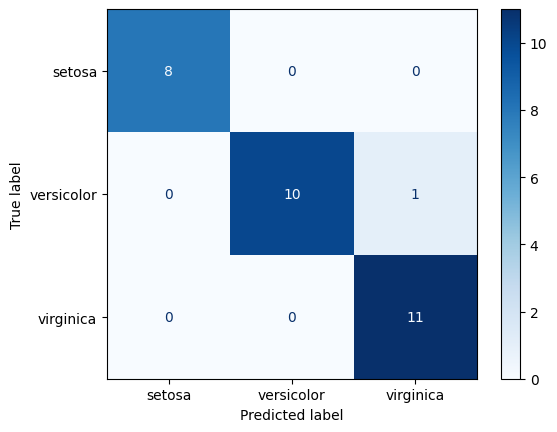

In [ ]:
# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Classification Report

Le Classification Report fournit une vue détaillée des performances du modèle pour chaque classe, ce qui est crucial pour comprendre comment le modèle se comporte dans des scénarios multi-classes ou déséquilibrés. Il aide également à identifier les forces et les faiblesses du modèle dans la classification des différentes catégories.

In [29]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

